<a href="https://colab.research.google.com/github/PriyanshTratiya/Diamonds_prices_model/blob/main/Diamonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, ShuffleSplit, KFold, cross_val_predict, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
dataset = pd.read_csv('/content/diamonds.csv')
#Checking for null values
dataset.isna().sum().head(15)

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [ ]:
dataset

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
#Label encoding data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labelList = ['cut', 'color', 'clarity']
for i in labelList:
  dataset[i] = le.fit_transform(dataset[i])
dataset

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
#Checking the correlations of price
correlation_matrix = dataset.corr()
correlation_matrix['price'].sort_values(ascending = False)

price         1.000000
carat         0.921591
x             0.884435
y             0.865421
z             0.861249
color         0.172511
table         0.127134
cut           0.039860
depth        -0.010647
clarity      -0.071535
Unnamed: 0   -0.306873
Name: price, dtype: float64

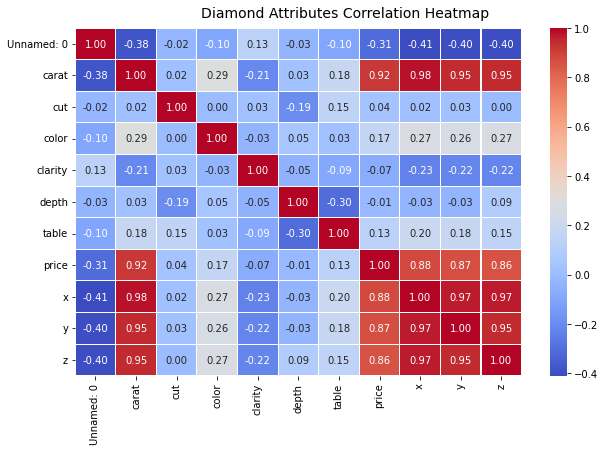

In [ ]:
#Checking the heat map for correlations
f, ax = plt.subplots(figsize=(10, 6))
hm = sns.heatmap(round(correlation_matrix,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Diamond Attributes Correlation Heatmap', fontsize=14)

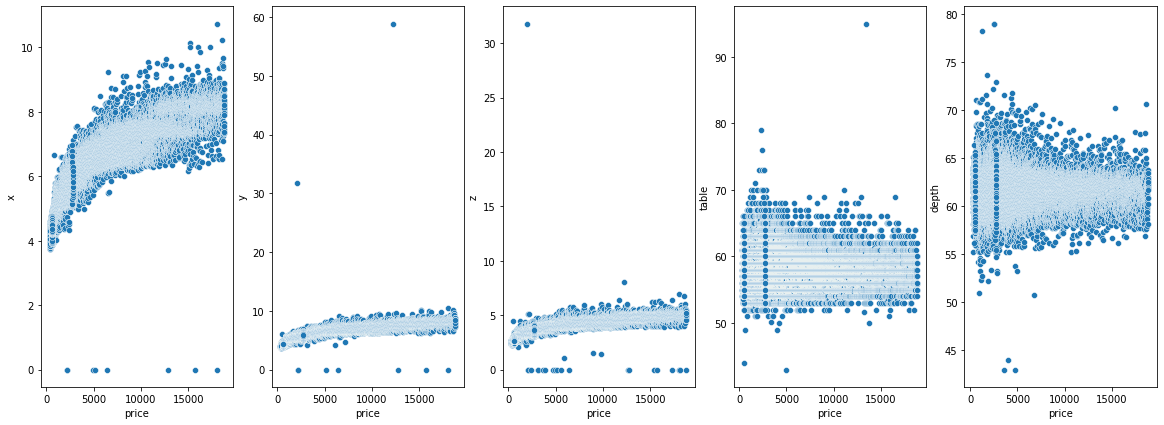

In [ ]:
#Looking for outliers, if any
cols = ['x','y', 'z', 'table', 'depth']
c = 0

fig, axs = plt.subplots(ncols = len(cols), figsize=(20,7))

for i in cols:
    sns.scatterplot(data = dataset, x = dataset['price'], y = dataset[i], ax = axs[c])
    c+=1

In [ ]:
#Removing Outliers
dataset = dataset[(dataset['x'] < 30)]
dataset = dataset[(dataset['y'] < 30)]
dataset = dataset[(dataset['z'] < 30) & (dataset['z'] > 2)]
dataset = dataset[(dataset['table'] < 80) & (dataset['table'] > 40)]
dataset = dataset[(dataset['depth'] < 75) & (dataset['depth'] > 45)]

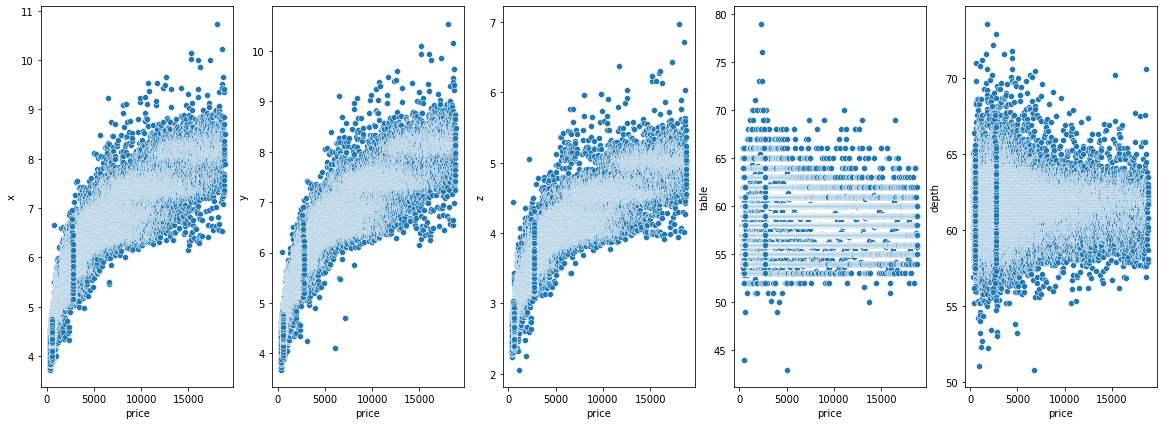

In [ ]:
#After the outliers are removed
cols = ['x','y', 'z', 'table', 'depth']
c = 0

fig, axs = plt.subplots(ncols = len(cols), figsize=(20,7))

for i in cols:
    sns.scatterplot(data = dataset, x = dataset['price'], y = dataset[i], ax = axs[c])
    c+=1

In [ ]:
#Rearranging dataframe
dataset = dataset[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'price']]

In [ ]:
#Extracting X and y features
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**XGBRegression**

In [ ]:
#Fitting the xgbregressor model
from xgboost import XGBRegressor
xgb_regressor = XGBRegressor().fit(X_train, y_train)

[13:31:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#Cross validation R2 score
cv = ShuffleSplit(n_splits=5, test_size=0.30, random_state=42)
linear_reg_r2_score = cross_val_score(xgb_regressor, X, y, cv=cv, scoring='r2').mean().round(4)
print('Cross validation R2 score:', linear_reg_r2_score)

[13:31:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:31:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:31:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:31:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:31:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Cross validation R2 score: 0.9719


**Random Forest Regression**

In [ ]:
#Fitting the random forest regression model
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0).fit(X_train, y_train)

In [ ]:
#Cross validation R2 score
cv = ShuffleSplit(n_splits=5, test_size=0.30, random_state=42)
linear_reg_r2_score = cross_val_score(rf_regressor, X, y, cv=cv, scoring='r2').mean().round(4)
print('Cross validation R2 score:', linear_reg_r2_score)

Cross validation R2 score: 0.9789
